In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# establish a connection to the data
pork_data_path = Path("staging/pork_historical_cleaned.csv")
beef_data_path = Path("staging/Beef_historical_cleaned.csv")


#read data and store as a pandas data frame
pork_data = pd.read_csv(pork_data_path)
beef_data = pd.read_csv(beef_data_path)

#reformat date
pork_data['date'] = pd.to_datetime(pork_data['date'])
pork_data['year'] = pork_data['date'].dt.year

beef_data['date'] = pd.to_datetime(beef_data['date'])
beef_data['year'] = beef_data['date'].dt.year

beef_data

,date,Net farm value,Wholesale value,Retail value,year
0,2000-01-01,146.0,177.5,294.7,2000
1,2000-02-01,146.5,174.5,293.6,2000
2,2000-03-01,154.2,183.3,297.9,2000
3,2000-04-01,158.9,191.0,305.4,2000
4,2000-05-01,153.2,193.8,308.8,2000
...,...,...,...,...,...
271,2022-08-01,302.4,397.5,757.6,2022
272,2022-09-01,302.9,380.5,760.1,2022
273,2022-10-01,312.5,378.7,742.2,2022
274,2022-11-01,325.2,389.2,736.5,2022


In [23]:
#groupby year for each price
pork_data_group_mean = pork_data.groupby(['year']).mean()[['Net farm value','Retail value', 'Wholesale value']]

beef_data_group_mean = beef_data.groupby(['year']).mean()[['Net farm value','Retail value', 'Wholesale value']]



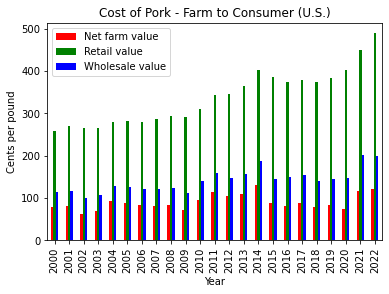

In [28]:
#create bar chart for pork
pork_bar = pork_data_group_mean.plot(kind="bar", color=["r", "g", "b"])

pork_bar.set_title("Cost of Pork - Farm to Consumer (U.S.)")
pork_bar.set_xlabel("Year")
pork_bar.set_ylabel("Cents per pound")


#export image to output folder
plt.savefig("output/pork_historical_price.png")
plt.show()

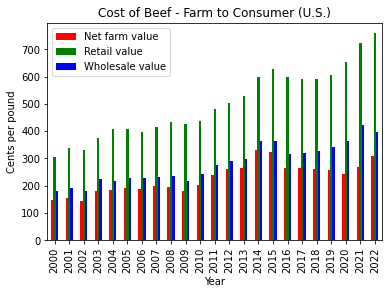

In [29]:
#create a bar chart for beef
beef_bar = beef_data_group_mean.plot(kind="bar", color=["r", "g", "b"])

beef_bar.set_title("Cost of Beef - Farm to Consumer (U.S.)")
beef_bar.set_xlabel("Year")
beef_bar.set_ylabel("Cents per pound")

#export
plt.savefig("output/beef_historical_price.png")
plt.show()